In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np

In [214]:
df = pd.read_csv('data/colleges.csv')
df = df.replace({'inStateTuition': {'Not reported': "0"}})

def cleanNum(num):
    num = num.replace(",", "")
    num = num.replace("$", "")
    num = num.strip()
    return int(num)

def getAdmit(admit):
    admit = admit.replace(" applicants were admitted", "")
    perc = int(admit.split('%')[0])
    app =  int(admit.split('of')[1].replace(",", ""))
    return perc, app

df['inStateTuition'] = df['inStateTuition'].apply(lambda x: cleanNum(x))

In [215]:
df.head()

,id,name,slug,universityType,populationType,cost,undergraduates,admissionRate,freshmanSatisfaction,inStateTuition,outOfStateTuition,admissionDeadline,chance,applicationStatus,financialAidStatus,address.street1,address.city,address.state,address.zipCode
0,1233,Brewton-Parker College,brewton-parker-college,Private,Coed,$$,783.0,54% of 589 applicants were admitted,49.0,18240,"$18,240",Rolling,NaN,NaN,NaN,"201 David-Eliza Fountain Circle, PO Box 197",Mt. Vernon,GA,30445
1,309,Briar Cliff University,briar-cliff-university,Private,Coed,NaN,1117.0,"51% of 1,741 applicants were admitted",78.9,0,Not reported,NaN,NaN,NaN,NaN,3303 Rebecca Street,Sioux City,IA,51104-0100
2,1444,Bridgewater College,bridgewater-college,Private,Coed,$$$,1713.0,"67% of 6,279 applicants were admitted",72.0,37720,"$37,720",Rolling,NaN,NaN,NaN,402 East College Street,Bridgewater,VA,22812-1599
3,158,Bridgewater State University,bridgewater-state-university,Public,Coed,NaN,9504.0,"90% of 6,806 applicants were admitted",78.0,0,Not reported,February 15,NaN,NaN,NaN,45 Plymouth St,Bridgewater,MA,02325
4,1069,Brigham Young University,brigham-young-university,Private,Coed,$,31292.0,"67% of 10,500 applicants were admitted",90.0,5970,"$5,970",December 15,NaN,NaN,NaN,D155 ASB,Provo,UT,84602-1001


In [216]:
f1 = df['inStateTuition'] > 1
f2 = df['admissionRate'] != "Not reported"
df = df[f1 & f2 & f3].copy()

In [217]:
results = df['admissionRate'].apply(lambda x: getAdmit(x))

df['perc'] = list(zip(*results))[0]
df['applied'] = list(zip(*results))[1]

f3 = df['applied'] > 1
f4 = ~pd.isna(df['universityType'])
df = df[f3 & f4]

df = df[['name', 'universityType', 'undergraduates', 'inStateTuition', 'applied']]
df.head()

,name,universityType,undergraduates,inStateTuition,applied
0,Brewton-Parker College,Private,783.0,18240,589
2,Bridgewater College,Private,1713.0,37720,6279
4,Brigham Young University,Private,31292.0,5970,10500
9,Brooklyn College (City University of New York),Public,14406.0,7240,20608
10,Brown University,Private,7160.0,60596,38674


### Make your Scatter Plot

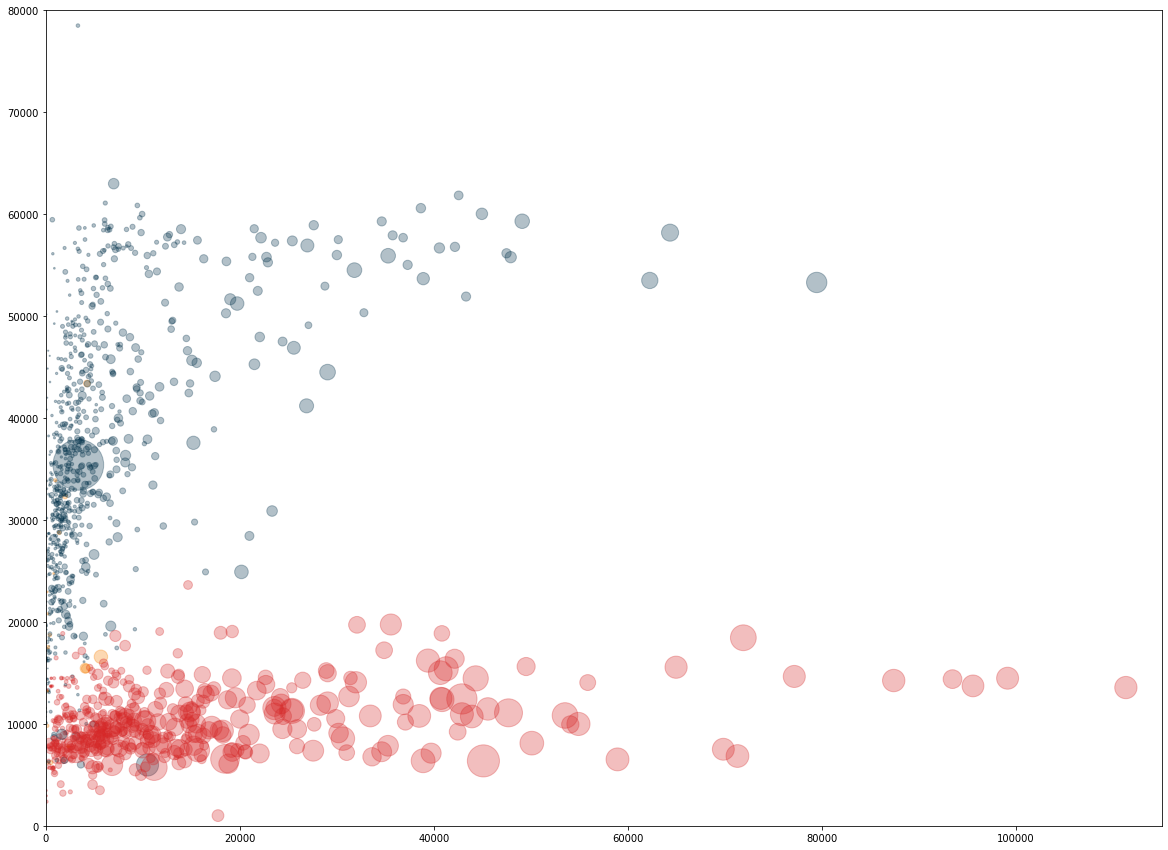

In [230]:
colors = {"Private": "#003049", "Public": "#d62828", "Private for-profit": "#f77f00"} 

plt.figure(figsize=(20,15))
plt.scatter(x=df['applied'],
            y=df['inStateTuition'],
            alpha=.3,
            s=(df['undergraduates']**1.15)/300,
            c=df['universityType'].apply(lambda x: colors[x]))

plt.xlim(0,115000);
plt.ylim(0,80000);

In [210]:
df.describe()

,undergraduates,inStateTuition,applied
count,1272.000000,1276.000000,1276.000000
mean,5888.156447,25891.709248,7806.502351
std,8689.364640,16167.043820,12087.560678
min,14.000000,1000.000000,3.000000
25%,1317.000000,10473.500000,1536.250000
50%,2439.500000,24685.000000,3652.500000
75%,6653.000000,37728.500000,8312.750000
max,131557.000000,78510.000000,111322.000000
